In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import joblib
import torch.optim as optim

In [20]:
df_mean = pd.read_csv("data_cleaned_mean.csv")
sc_mean = joblib.load('scaler_mean.save')

df_knn = pd.read_csv("data_cleaned_knn.csv")
sc_knn = joblib.load('scaler_knn.save')

df_median = pd.read_csv("data_cleaned_median.csv")
sc_median = joblib.load('scaler_median.save')

df_most_freq = pd.read_csv("data_cleaned_most_freq.csv")
sc_most_freq = joblib.load('scaler_most_freq.save')

df_nonans = pd.read_csv("data_cleaned_nonans.csv")
sc_nonans = joblib.load('scaler_nonans.save')

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(train_losses, test_losses, title='Learning Curve'):
    """
    Plot the learning curve.

    Parameters:
    - train_losses: List of training losses for each epoch
    - test_losses: List of test (validation) losses for each epoch
    - title: Title of the plot (default is 'Learning Curve')
    """
    epochs = np.arange(1, len(train_losses) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, test_losses, label='Test Loss', marker='o')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
bool_columns = df_nonans.select_dtypes(include='bool').columns
df_nonans[bool_columns] = df_nonans[bool_columns].astype(int)

X = df_nonans.drop('price', axis=1).values 
y = df_nonans['price'].values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 128
output_size = 1  

# Create the model
model = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001) 
num_epochs = 100
batch_size = 32  # Set the batch size
train_losses = []  # List to store training losses
test_losses = []   # List to store test losses

/tmp/ipykernel_8286/2304076755.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_8286/2304076755.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


Epoch [1/100], Training Loss: 7832486.165870157, Test Loss: 186172304.0
Epoch [2/100], Training Loss: 6008561.1424159985, Test Loss: 171294592.0
Epoch [3/100], Training Loss: 5527150.043820308, Test Loss: 154835616.0
Epoch [4/100], Training Loss: 4978867.703091685, Test Loss: 137095264.0
Epoch [5/100], Training Loss: 4463693.123058399, Test Loss: 123535976.0
Epoch [6/100], Training Loss: 4117194.2020439673, Test Loss: 115895688.0
Epoch [7/100], Training Loss: 3920563.7335857656, Test Loss: 111414176.0
Epoch [8/100], Training Loss: 3795780.214506286, Test Loss: 108466320.0
Epoch [9/100], Training Loss: 3713648.4809940443, Test Loss: 106568432.0
Epoch [10/100], Training Loss: 3658984.8229725757, Test Loss: 105274000.0
Epoch [11/100], Training Loss: 3620844.5448312624, Test Loss: 104394776.0
Epoch [12/100], Training Loss: 3594433.5102382177, Test Loss: 103800272.0
Epoch [13/100], Training Loss: 3574744.6957209026, Test Loss: 103336600.0
Epoch [14/100], Training Loss: 3558838.667193589, Te

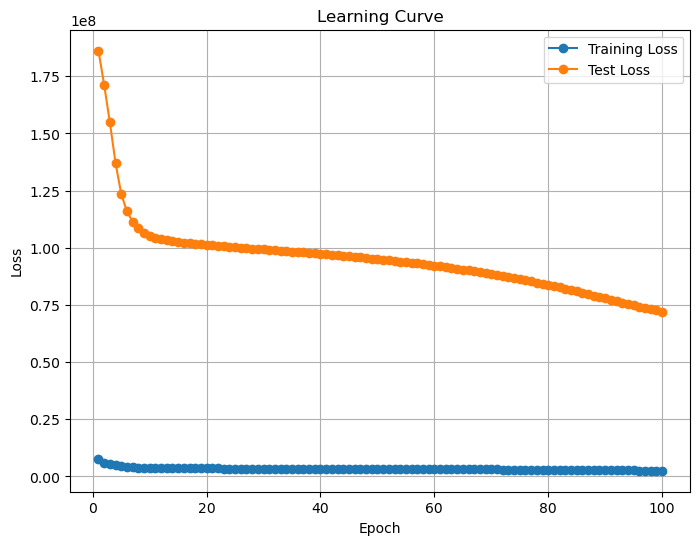

In [28]:
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y.view(-1, 1))  # Calculate the loss

        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_loss += loss.item()

    # Calculate test loss
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test.view(-1, 1))
        model.train()

    # Append losses to lists
    train_losses.append(epoch_loss / len(X_train))
    test_losses.append(test_loss.item())

    # Print the average loss for the epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')

# After training, you can use the lists to plot the learning curve
plot_learning_curve(train_losses, test_losses)

In [18]:
model_knn.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 3.6919e-03,  7.8547e-03,  1.6043e-02,  ...,  2.0992e-02,
                        4.3419e-03,  7.5576e-03],
                      [ 1.3462e+01, -6.5984e+00,  9.2181e-01,  ...,  3.8261e+00,
                        3.2680e-01,  4.3965e+00],
                      [ 1.2261e+01, -4.4657e+00,  1.3940e+00,  ...,  3.8329e+00,
                        3.0018e-01,  4.3700e+00],
                      ...,
                      [ 8.9156e+00, -2.0806e+00,  2.0568e+00,  ...,  3.8062e+00,
                        1.0477e+00,  4.3822e+00],
                      [ 1.1086e+01, -3.3257e+00,  1.8622e+00,  ...,  3.8113e+00,
                        3.5671e-01,  4.4005e+00],
                      [-3.1861e-03,  3.1103e-03,  8.8924e-03,  ..., -1.7771e-02,
                        1.6307e-02, -2.7766e-02]])),
             ('fc1.bias',
              tensor([-5.0552e-02,  2.0541e+00,  7.6819e+00, -2.0316e+00,  4.1960e+00,
                      -5.0195e-02,  7.8173e

In [21]:
model_mean.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 1.2590e+01, -3.6639e+00,  1.3286e+00,  ...,  3.6282e+00,
                        2.9736e-01,  4.2302e+00],
                      [ 1.3816e+01, -6.2119e+00,  8.6641e-01,  ...,  3.6613e+00,
                        2.8976e-01,  4.2091e+00],
                      [ 9.9773e+00, -2.0131e+00,  1.9737e+00,  ...,  3.6198e+00,
                        6.7625e-01,  4.2771e+00],
                      ...,
                      [-1.9078e-03,  9.7246e-03, -1.5689e-02,  ..., -2.7786e-02,
                        1.0881e-02,  4.4966e-03],
                      [ 1.1406e+01, -2.6908e+00,  1.6383e+00,  ...,  3.6233e+00,
                        2.8937e-01,  4.2457e+00],
                      [ 1.1025e+01, -2.5884e+00,  1.6920e+00,  ...,  3.6318e+00,
                        2.8571e-01,  4.3020e+00]])),
             ('fc1.bias',
              tensor([ 7.2848e+00, -5.3350e-01,  1.1877e+01, -4.4107e+00, -2.9137e-02,
                       1.0366e+01, -3.4950e

In [22]:
model_median.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 1.4071e+01, -6.8923e+00,  9.6814e-01,  ...,  3.6576e+00,
                        3.2543e-01,  4.7618e+00],
                      [ 1.3699e+01, -4.7653e+00,  1.2499e+00,  ...,  3.6054e+00,
                        3.1844e-01,  4.7488e+00],
                      [-7.2665e-04,  4.1593e-03, -1.0188e-03,  ..., -2.6788e-02,
                       -2.4853e-02, -1.4798e-02],
                      ...,
                      [ 1.2026e+01, -3.1133e+00,  1.7464e+00,  ...,  3.6262e+00,
                        3.3591e-01,  4.7963e+00],
                      [ 5.4642e-03,  4.2705e-03, -1.3733e-02,  ..., -2.0692e-02,
                       -3.0064e-02, -4.1029e-03],
                      [ 1.3811e+01, -4.9992e+00,  1.2475e+00,  ...,  3.6766e+00,
                        3.0115e-01,  4.7658e+00]])),
             ('fc1.bias',
              tensor([-1.7920e+00,  4.5491e+00, -5.6265e-02, -3.5414e+00, -3.4216e-02,
                      -5.0046e+00, -7.9662e

In [11]:
def scale_numerical_input(year, mileage, scaler):
    user_input = {
        "year" : year,
        "mileage" : mileage/1000
    }
    
    input_df = pd.DataFrame([user_input])
    input_df_scaled = pd.DataFrame(scaler.transform(input_df), columns=["year", "mileage"])
    res = input_df_scaled.to_numpy()
    user_input["year"], user_input["mileage"] = res[0][0], res[0][1]
    return user_input
    

In [14]:
def transform_raw_input_to_df(brand, model, engine, year, mileage, df, sc):
    user_input = df.iloc[0].copy()
    user_input.loc[:] = 0
    user_input.drop('price', inplace=True)
    
    # Handling categoricals
    user_input['brand_' + brand] = 1
    user_input['model_' + model] = 1
    user_input['engine_' + engine] = 1
    
    # Handling numericals 
    scaled_nums = scale_numerical_input(year, mileage, sc)
    user_input["mileage"] = scaled_nums["mileage"]
    user_input["year"] = scaled_nums["year"]
    
    return user_input
    

In [23]:
torch.save(model_knn.state_dict(), 'model_v_0.0.1_knn.pth')
torch.save(model_mean.state_dict(), 'model_v_0.0.1_mean.pth')
torch.save(model_median.state_dict(), 'model_v_0.0.1_median.pth')

In [16]:
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1  
model_eval = NeuralNetwork(input_size, hidden_size, output_size)
state_dict = torch.load('model_v_0.0.1.pth')
model_eval.load_state_dict(state_dict)


SyntaxError: unmatched ')' (1970165865.py, line 4)

In [15]:
data = transform_raw_input_to_df("Opel", "Insignia", "2.0D", 2010, 239000, df_mean, sc_mean)
with torch.no_grad():
    inputs = torch.tensor(data, dtype=torch.float32)
    predictions = model.eval(inputs).numpy()

NameError: name 'model' is not defined

In [30]:
torch.save(model.state_dict, 'model_nonans.0.0.1.pth')

In [ ]:
_